# Assignment #1

Author: Kristen Waterford

Collaborators:

Integrity Statement: Did you use an LLM to write any of the code in your assignment? (Y/N): N


# Instructions

You are permitted to work with a partner in the class to complete your assignment, but no more than one partner. However, every student must submit their own copy of the assignment, and must list your collaborators.

You should refer to your textbook and posted course materials as resources. You are also allowed to use the documentation for python, pandas, matplotlib, and seaborn. You may not use other online resources or LLMs for this assignment.

You will be graded based on (1) correctness, (2) completeness, (3) documentation, and (4) overall readability of your notebook. The assignment will be worth a total of 100 points in the Homework category (15% of your grade).

**Submission and Deadline: This assignment must be submitted on Canvas before class begins on Wednesday, September 17.**

You must complete all of the steps below:

1. Organize your project in a project folder (or repo) with three subfolders: src, data, and presentations. Place the provided dataset in the data folder, and the two provided notebooks in the src folder.
2. Use a python virtual environment, install the libraries you use, and create a requirements.txt file (using `pip freeze`)
3. Open and read through the provided data cleaning notebook to understand the cleaning process and all of its operations. (Fair game).
4. Run the separate notebook provided for cleaning the CDC data. It should create a new file. You do not need to edit that notebook at all, and only need to run it once. All coding will take place in this notebook.

The rest of the assignment should be completed in this notebook:

1. Read in the clean data in from the provided csv file and write code to examine it and understand it
2. Write code to determine which cancer site had the highest incidence of new cases for females in each individual year included in the dataset, and present your results
3. Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)
4. Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each individual cancer site (many lines)
5. Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females
6. Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000
7. For each cancer site and each year, determine whether males or females had the higher incidence (hint: groupby)
8. Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

9. Add your full name and the full names of your collaborator (if any) at the top of this document. Answer the integrity statement. 
10. Submit this notebook on Canvas together with the requirements.txt file

**NOTE:** For each plot, add a descriptive title and label the axes appropriately, and remark on any observations that you make.

**HINT #1:** Most problems can be solved by some combination of filtering and/or groupby before aggregating (e.g., taking the max) and plotting.

**HINT #2:** You can solve these problems in any order, so do the ones you find easiest first and the rest will start to feel easier.

**Useful Documentation**
- Pandas general documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Pandas dataframe reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
- Pandas Copy-on-Write: https://pandas.pydata.org/docs/user_guide/copy_on_write.html
- Pandas missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Pandas split-apply-combine (groupby, agg): https://pandas.pydata.org/docs/user_guide/groupby.html 

- Matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html
- Seaborn documentation: https://seaborn.pydata.org/


# Imports and CoW

In [1]:
#Uncomment the libraries you need. Be sure to install whichever ones you need into your Python virtual environment. You may also need to also install Jupyter or iPython to run your notebook, depending on your setup.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
from pathlib import Path

In [2]:
pd.set_option("mode.copy_on_write", True) # will be the default in pandas 3.0, best to enforce it

# 1. Read in Data

In [3]:
cwd = Path().cwd() 
project_folder = cwd.parent 
dataset_path = project_folder / 'data' / 'clean_cdc_cancer.csv'

file = project_folder / dataset_path 

if not file.exists():
    raise FileNotFoundError(f"Dataset file not found: {dataset_path}")

cancer = pd.read_csv(dataset_path)

# 2. Incidence for Females Each Year

Write code to determine which cancer site had the highest incidence of new cases for females in each year 1999-2022 (hint: filter then groupby then agg)

In [5]:
# Thought I'd start with filtering the years to 1999 - 2022, and women only period
cancer_filter = cancer[(cancer['Year'] >= 1999) & (cancer['Year'] <= 2022) & (cancer['Sex'] == 'F')]

# Group by Year and Cancer Site, sum counts
grouped = cancer_filter.groupby(['Year', 'Cancer Sites'])['Count'].sum().reset_index()
print(grouped.sort_values('Count', ascending=False).head(10))

# For each year, got the cancer site with highest incidence
cancer_max = grouped.loc[grouped.groupby('Year')['Count'].idxmax()].sort_values('Year')

print(cancer_max)


      Year                        Cancer Sites   Count
2160  2021  All Invasive Cancer Sites Combined  918189
2258  2022  All Invasive Cancer Sites Combined  907701
1964  2019  All Invasive Cancer Sites Combined  907067
1866  2018  All Invasive Cancer Sites Combined  884436
1768  2017  All Invasive Cancer Sites Combined  869277
1670  2016  All Invasive Cancer Sites Combined  858727
1572  2015  All Invasive Cancer Sites Combined  848241
2062  2020  All Invasive Cancer Sites Combined  839794
1474  2014  All Invasive Cancer Sites Combined  827645
1376  2013  All Invasive Cancer Sites Combined  810890
      Year                        Cancer Sites   Count
4     1999  All Invasive Cancer Sites Combined  631741
102   2000  All Invasive Cancer Sites Combined  641968
200   2001  All Invasive Cancer Sites Combined  662313
298   2002  All Invasive Cancer Sites Combined  667753
396   2003  All Invasive Cancer Sites Combined  676099
494   2004  All Invasive Cancer Sites Combined  687327
592   2005

# 3. Line plots for male and female, all sites

Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)

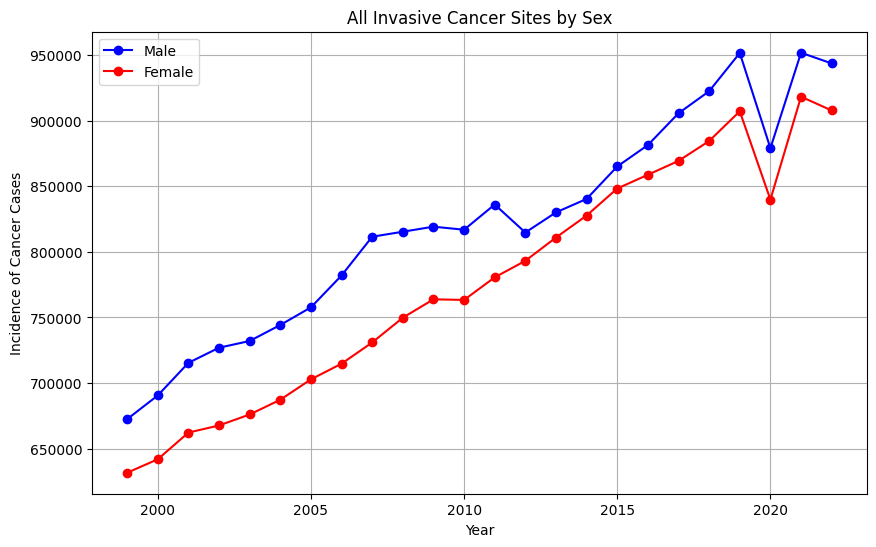

In [6]:
# slice out cancer sites other than 'All Invasive Cancer Sites Combined'
# groupy by year and sex, with sum counts
invasive_all = cancer[cancer['Cancer Sites'] == 'All Invasive Cancer Sites Combined'] 

invas_grp = invasive_all.groupby(['Year', 'Sex']).agg({'Count': 'sum'}).reset_index()

# seperate male and female data for plotting

male_data = invas_grp[invas_grp['Sex'] =='M'] 
female_data = invas_grp[invas_grp['Sex'] =='F']

# plotting male and female lines

plt.figure(figsize=(10,6))
plt.plot(male_data['Year'], male_data['Count'], label='Male', color='blue', marker='o')
plt.plot(female_data['Year'], female_data['Count'], label='Female', color='red', marker='o')
plt.title('All Invasive Cancer Sites by Sex')
plt.xlabel('Year')
plt.ylabel('Incidence of Cancer Cases')
plt.grid(True)
plt.legend()
plt.show()

# 4. Line plots for cancer sites

 Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each cancer site (many lines)

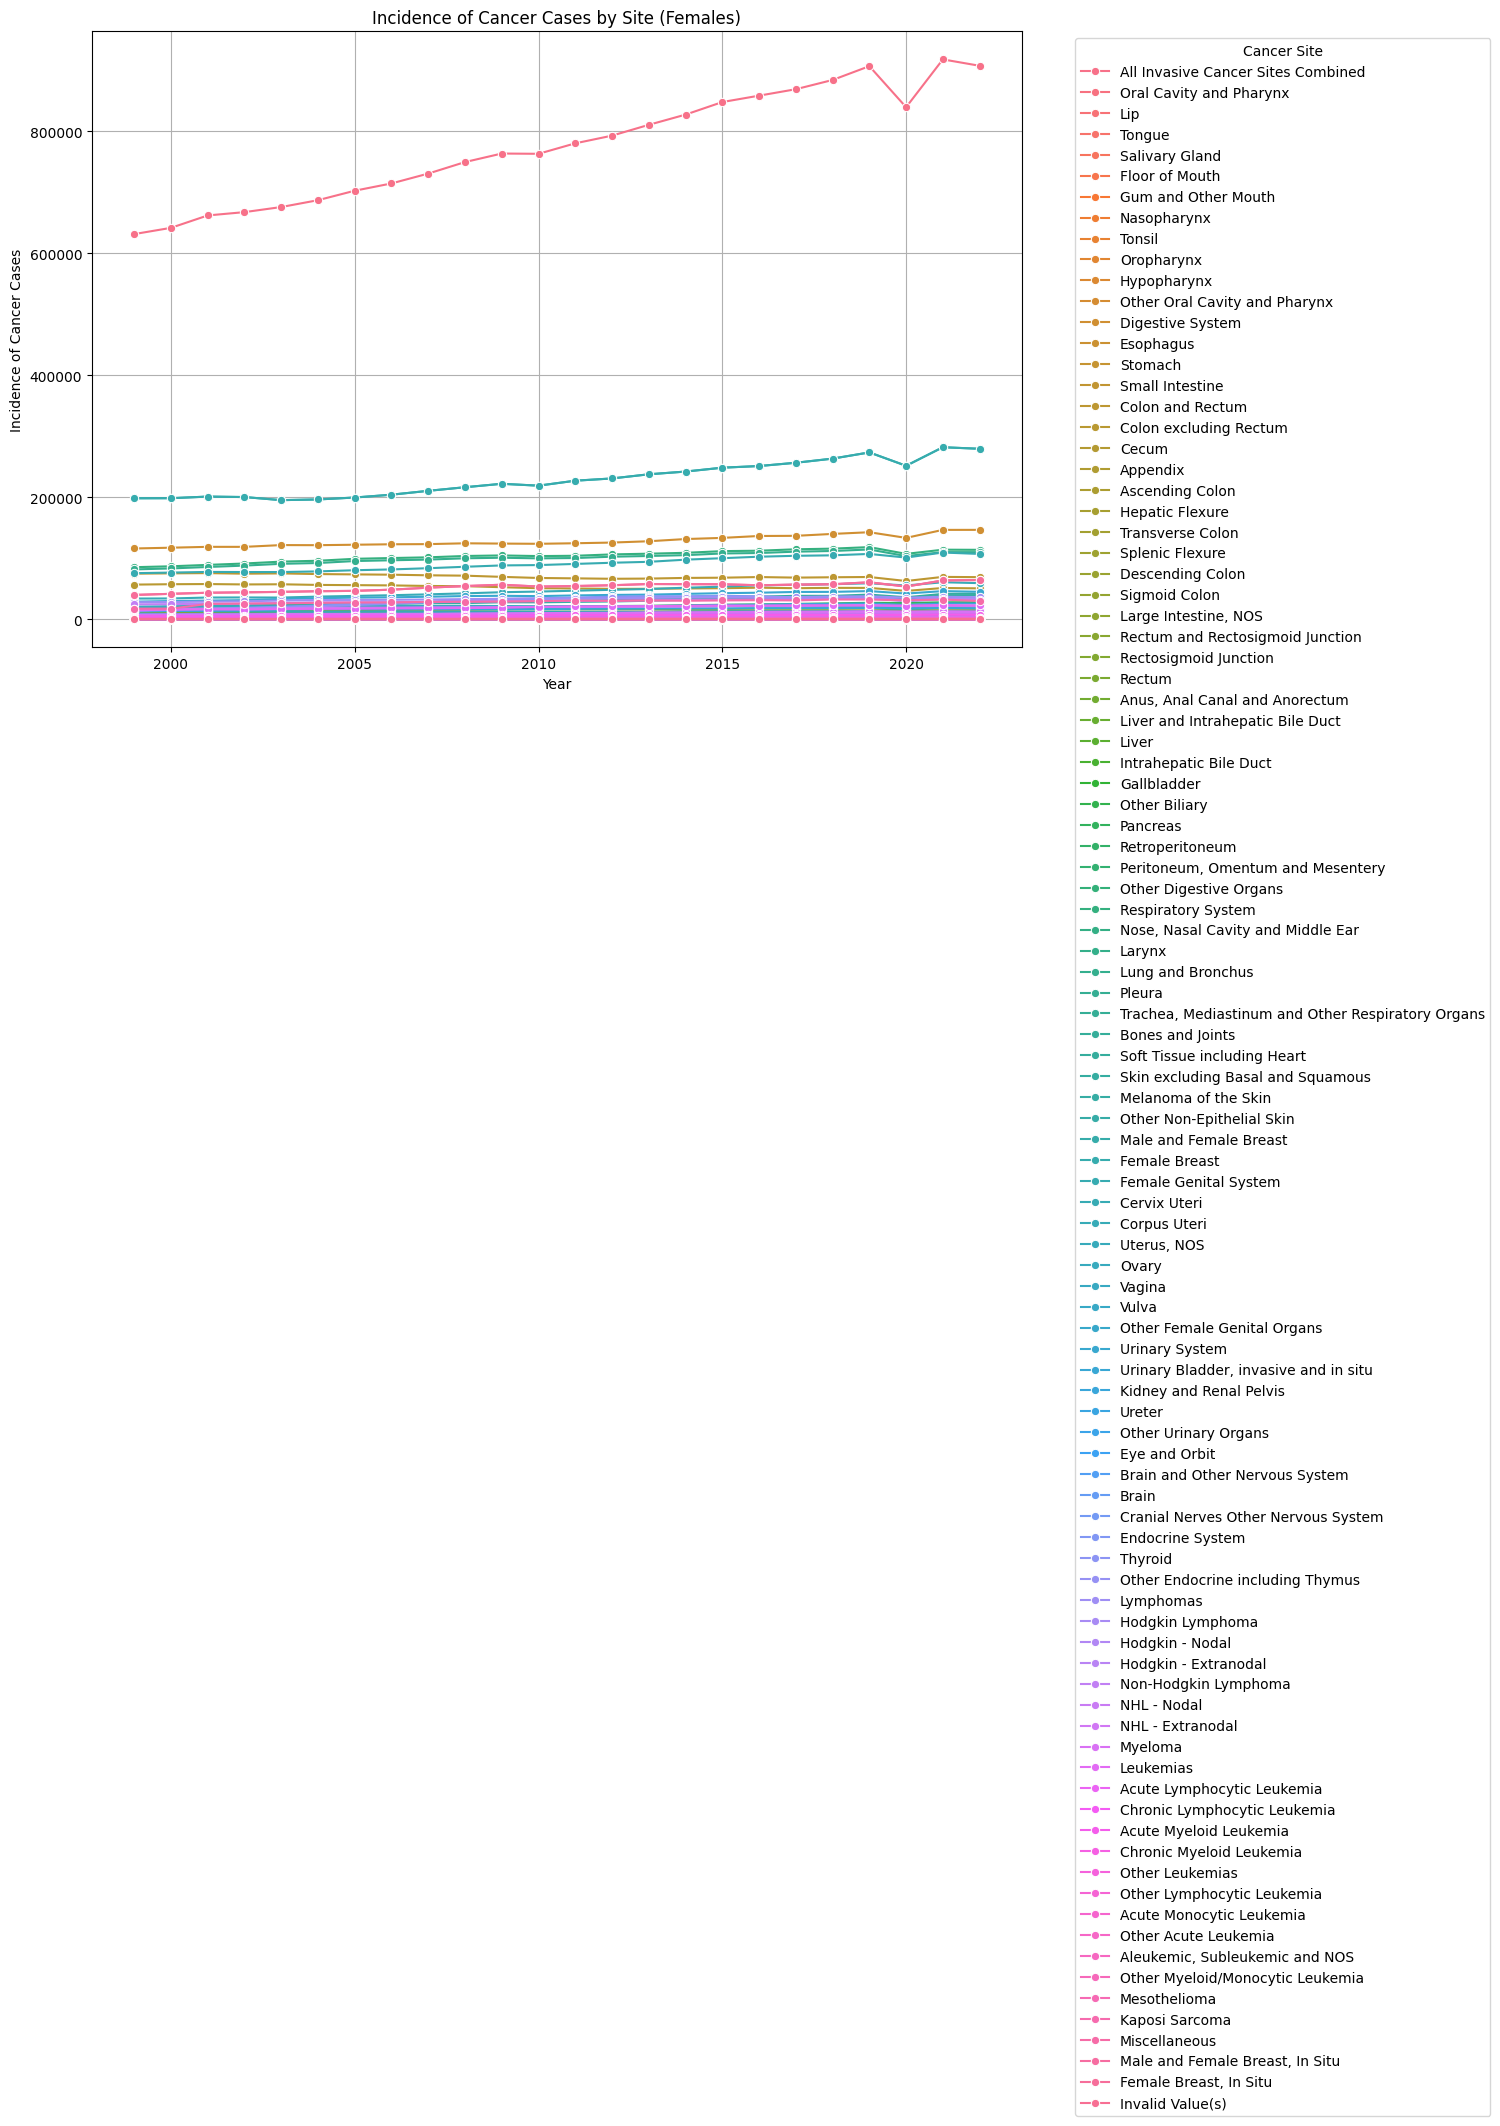

In [7]:
# Cut down sex to F, overcomplicated this way too much
female_only = cancer[cancer['Sex'] == 'F']

plt.figure(figsize=(12,8))
sns.lineplot(data= female_only, x='Year', y='Count', hue ='Cancer Sites', marker='o')

plt.title('Incidence of Cancer Cases by Site (Females)')
plt.xlabel('Year')
plt.ylabel('Incidence of Cancer Cases')
plt.grid(True)
plt.legend(title='Cancer Site', bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.show()

# 5. Scatter plot for 2020

Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females

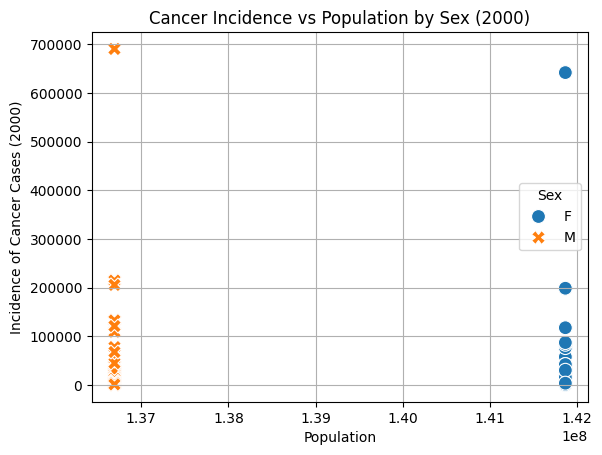

In [8]:
# Slice years down to contain data only from 2000
# then group by each pair, their sum counts and populations

slicer = cancer[cancer['Year']== 2000] 
pop_grp = slicer.groupby(['Cancer Sites','Sex']).agg({'Count':'sum', 'Population':'sum'}).reset_index()

#plot scatter plot of pop vs count
sns.scatterplot(data=pop_grp, x='Population', y='Count', hue='Sex', style='Sex', s=100)
plt.xlabel("Population")
plt.ylabel("Incidence of Cancer Cases (2000)")
plt.title("Cancer Incidence vs Population by Sex (2000)")
plt.grid(True)
plt.legend(title="Sex")
plt.show()

# 6. Bar plot for each site

Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000

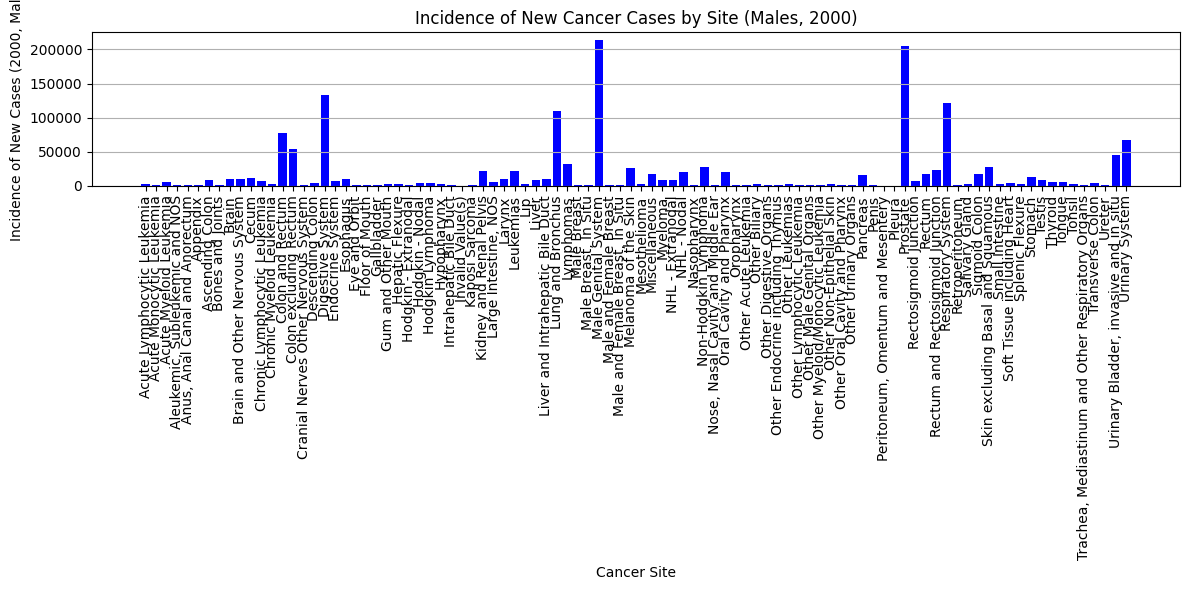

In [9]:
# slice down year 2000 & contain only males, and not 'All Invasive Cancer Sites Combined'
# group by cancer site and sex, with sum counts
slicer = cancer[(cancer['Year']== 2000) & (cancer['Sex']=='M') & (cancer['Cancer Sites'] != 'All Invasive Cancer Sites Combined')] 
pop_grp = slicer.groupby(['Cancer Sites','Sex']).agg({'Count':'sum'}).reset_index()

# plot bar graph of cancer vs count 
plt.figure(figsize=(12,6))
plt.bar(pop_grp['Cancer Sites'], pop_grp['Count'], color='blue')
plt.xlabel("Cancer Site")
plt.ylabel("Incidence of New Cases (2000, Males)")
plt.title("Incidence of New Cancer Cases by Site (Males, 2000)")
plt.xticks(rotation=90) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 7. Higher Incidence Between Sexes

For each cancer site and each year, determine whether males or females had the higher incidence

In [10]:
# group by cancer and year and sex, with sum counts
# find the max icidence for each site and year
high = cancer.groupby(['Year','Cancer Sites','Sex']).agg({'Count':'sum'}).reset_index()

high_ind = high.loc[high.groupby(['Year','Cancer Sites'])['Count'].idxmax()]

print(high_ind.head())


   Year                        Cancer Sites Sex   Count
1  1999          Acute Lymphocytic Leukemia   M    2188
3  1999            Acute Monocytic Leukemia   M     300
5  1999              Acute Myeloid Leukemia   M    5352
7  1999      Aleukemic, Subleukemic and NOS   M     736
9  1999  All Invasive Cancer Sites Combined   M  672530


# 8. Pivot table for cancer / year

Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

In [11]:
# pivoty table of cancer sites vs year, with count
pivoty = cancer.pivot_table(index='Cancer Sites', columns='Year', values='Count')

# print results/display rows
print(pivoty.head())


Year                                    1999      2000      2001      2002  \
Cancer Sites                                                                 
Acute Lymphocytic Leukemia            1920.0    2024.5    2079.5    2061.0   
Acute Monocytic Leukemia               274.5     295.0     345.0     352.0   
Acute Myeloid Leukemia                5000.0    5322.0    5388.0    5226.0   
Aleukemic, Subleukemic and NOS         692.5     701.5     695.0     706.0   
All Invasive Cancer Sites Combined  652135.5  666283.0  688875.0  697360.0   

Year                                    2003      2004      2005      2006  \
Cancer Sites                                                                 
Acute Lymphocytic Leukemia            2104.0    2214.5    2171.0    2275.0   
Acute Monocytic Leukemia               383.5     391.5     387.0     383.5   
Acute Myeloid Leukemia                5422.0    5450.5    5368.5    5530.0   
Aleukemic, Subleukemic and NOS         756.0     753.5     784.